# Index

1. [Overview](##Overview)
2. [Importing Modules, Reading the Dataset and Defining an Evaluation Table](#Importing-Modules,-Reading-the-Dataset-and-Defining-an-Evaluation-Table)
3. Defining a Function to Calculate the Adjusted  R2 
4. Visualizing and Examining Data
    - Checking Out the Correlation Among Explanatory Variables
5. Creating a Simple Linear Regression
    - Let's Show the Result
6. Data Preprocessing
    - Binning
7. Regression
    - RandomForest Regression
    - K-NN Regression
8. Regularization
    - Ridge Regression
    - Lasso Regression
9. Polynomial Regression
10. Evaluation Table
11. Conclusion


To Read:
https://python-visualization.github.io/folium/quickstart.html

# Overview

# Importing Modules, Reading the Dataset and Defining an Evaluation Table

In [402]:
# Handling warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data pre-processing
import numpy as np 
import pandas as pd

# Viz.
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.family'] = "Arial"

import missingno

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)

import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Geographical Viz.
import folium
from folium.plugins import HeatMap

# Utils
import collections
import itertools
                   
# Scientific computing
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p

import statsmodels
import statsmodels.api as sm

# ML Sklearn                   
from sklearn.svm import SVR
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV

# Other ML
from xgboost import XGBRegressor

#Model interpretation modules
import eli5
import lime
import lime.lime_tabular
import shap
shap.initjs() # Load JS visualization code to notebook

In [403]:
# Evaluation dataframe
evaluation = pd.DataFrame(
    {
        'Model': [],
        'Details': [],
        'Root Mean Squared Error(RMSE)': [],
        'R-Squared(Training)': [],
        'Adjusted R-Squared(training)': [],
        'R-Squared(test)': [],
        'Adjusted R-Sqaured(test)': [],
        '5-fold cross validation': []
    })

In [404]:
# Read and describe the data
df = pd.read_csv("data/kc_house_data.csv")

In [405]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [406]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Defining a Function to Calculate the Adjusted R2

Let us first understand what is R-squared:

R-squared or R2 explains the degree to which your input variables explain the variation of your output / predicted variable. So, if R-square is 0.8, it means 80% of the variation in the output variable is explained by the input variables. So, in simple terms, higher the R squared, the more variation is explained by your input variables and hence better is your model.

However, the problem with R-squared is that it will either stay the same or increase with addition of more variables, even if they do not have any relationship with the output variables. This is where “Adjusted R square” comes to help. Adjusted R-square penalizes you for adding variables which do not improve your existing model.

Hence, if you are building Linear regression on multiple variable, it is always suggested that you use Adjusted R-squared to judge goodness of model. In case you only have one input variable, R-square and Adjusted R squared would be exactly same.

Typically, the more non-significant variables you add into the model, the gap in R-squared and Adjusted R-squared increases.



# Visualizing and Examining Data

In [407]:
# Since date and id have no significance in analysing the hist
hist_cols = list(set(df.columns) -  set({'date', 'id'}))

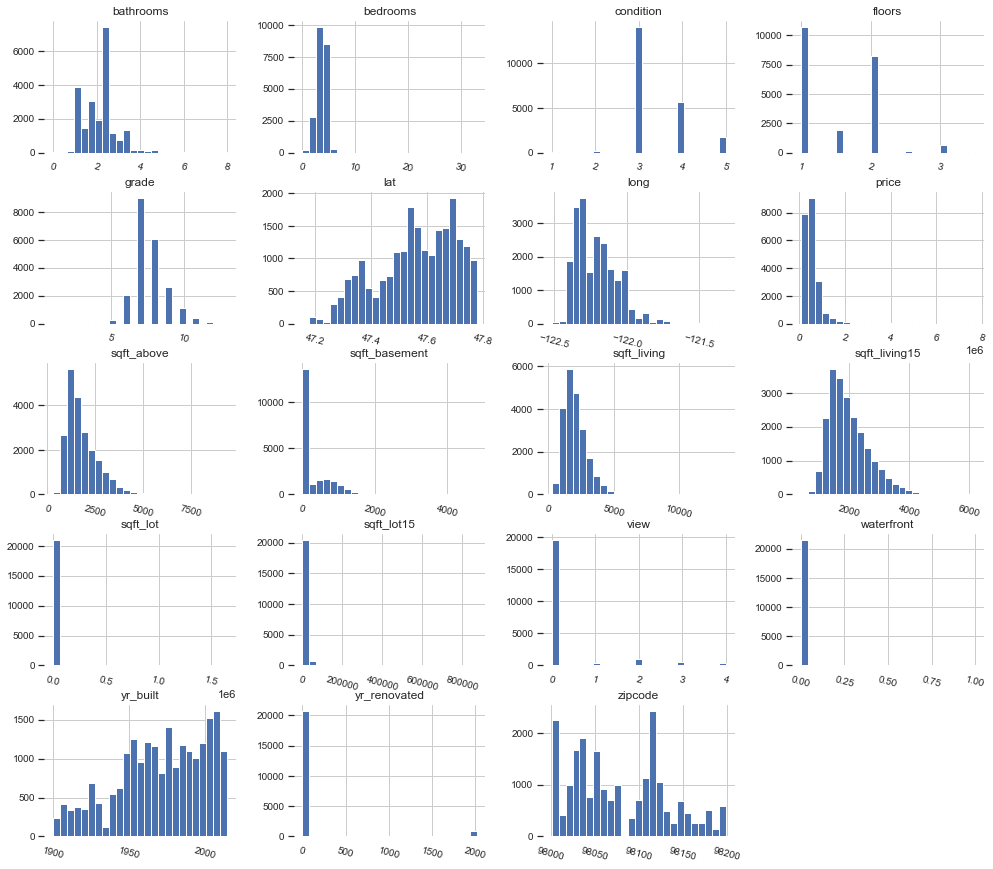

In [408]:
df1 = df[hist_cols]
h = df1.hist(bins=25,figsize=(15,15),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

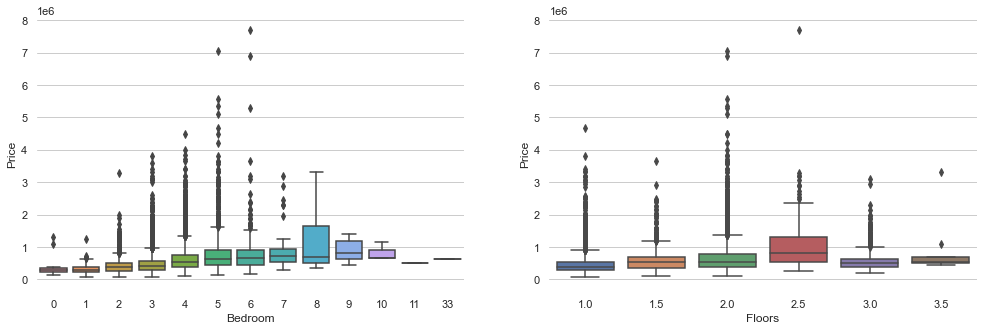

In [409]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df['bedrooms'], y=df['price'], ax=axes[0])
axes[0].set(xlabel='Bedroom', ylabel='Price')

sns.boxplot(x=df['floors'], y=df['price'], ax=axes[1])
axes[1].set(xlabel='Floors', ylabel='Price')

sns.despine(left=True, bottom=True)

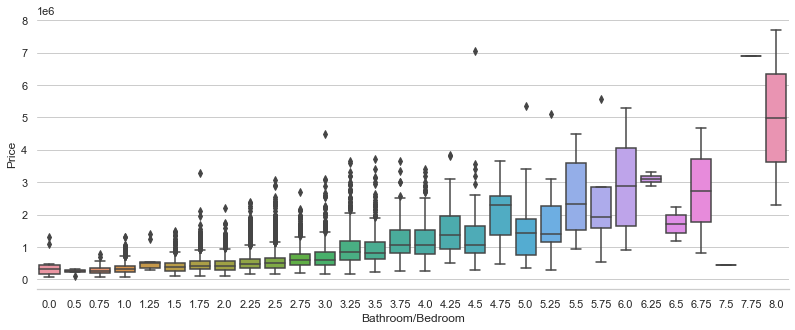

In [410]:
f, axes = plt.subplots(1, 1, figsize=(12,5))
sns.boxplot(x=df['bathrooms'], y=df['price'], ax=axes)
axes.set(xlabel="Bathroom/Bedroom", ylabel="Price")
sns.despine(left=True, right=True)

The above price vs other features do not show great linear relationship. To show the relationship between eachother, a 3D plot would seem more app

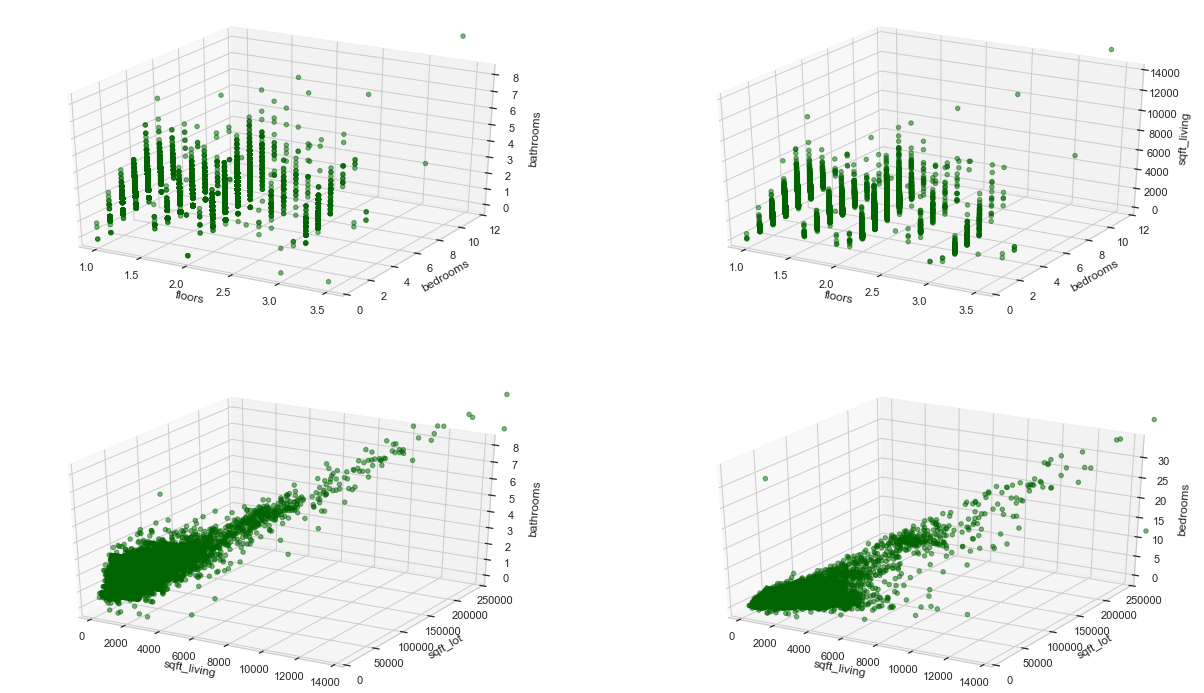

In [411]:
relationship_sets = [['floors', 'bedrooms', 'bathrooms', 0, 12], ['floors', 'bedrooms', 'sqft_living', 0, 12],
                     ['sqft_living', 'sqft_lot', 'bathrooms', 0, 250000], ['sqft_living', 'sqft_lot', 'bedrooms', 0, 250000]]
fig=plt.figure(figsize=(19,12.5))

for i, e_set in enumerate(relationship_sets):
    ax=fig.add_subplot(2, 2, i+1, projection="3d")
    ax.scatter(df[e_set[0]], df[e_set[1]], df[e_set[2]], c="darkgreen", alpha=.5)
    ax.set(xlabel=e_set[0], ylabel=e_set[1], zlabel=e_set[2])
    ax.set(ylim=[e_set[3],e_set[4]]);

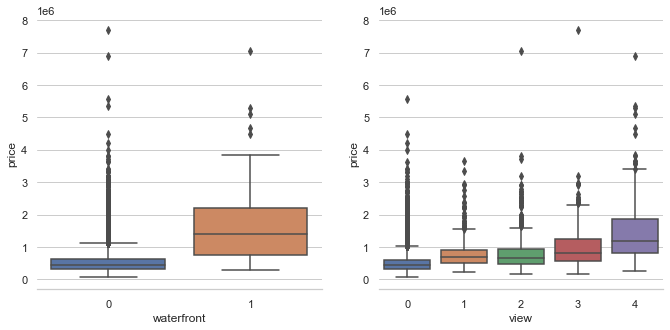

In [412]:
f, axes = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(x=df['waterfront'], y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'], y=df['price'], ax=axes[1])
sns.despine(left=True, right=True)

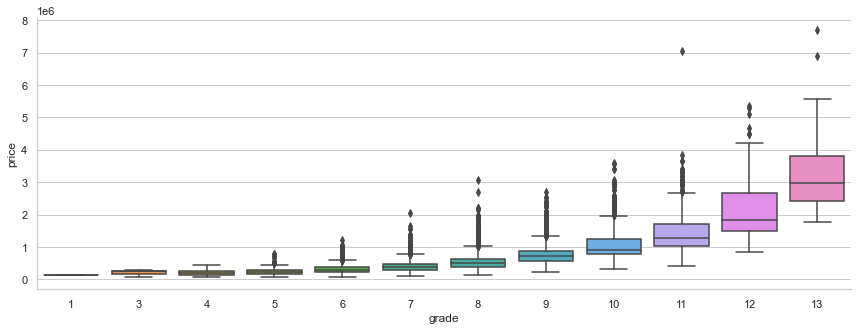

In [413]:
f, axes = plt.subplots(1, 1, figsize=(13, 5))
sns.boxplot(x=df['grade'], y=df['price'], ax=axes)
sns.despine()
ax.set(xlabel="Grade", ylabel="Price");

Using the longitude and longitude information to plot a heat map on the geograpical map to examine possible important regions

In [414]:
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]

In [415]:
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [416]:
df_copy = df.copy()

df_copy['count'] = 1
basemap = generateBaseMap()

# Add a carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s = folium.FeatureGroup(name='icon').add_to(basemap)

# Add a pointer to the highest position house
folium.Marker([maxpr['lat'], maxpr['long']], popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)

# Add a heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

## Checking Out the Correlation Among Explanatory Variables

Having too many features in a model is not always a good thing because it might cause overfitting and worser results when we want to predict values for a new dataset. Thus, if a feature does not improve your model a lot, not adding it may be a better choice.

Another important thing is correlation. If there is very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. For instance, if there is overfitting, we may remove sqt_above or sqt_living because they are highly correlated. This relation can be estimated when we look at the definitions in the dataset but to be sure correlation matrix should be checked. However, this does not mean that you must remove one of the highly correlated features. For example: bathrooms and sqrt_living. They are highly correlated but I do not think that the relation among them is the same as the relation between sqt_living and sqt_above.

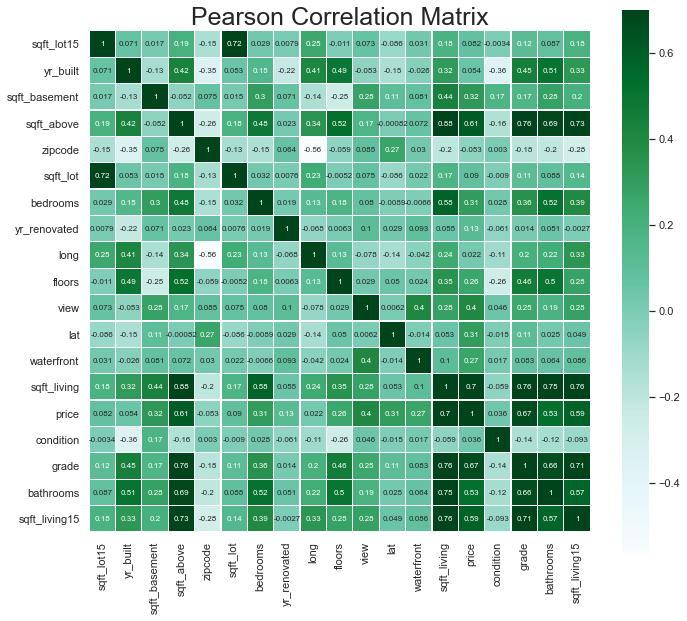

In [417]:
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df[hist_cols].corr(),linewidths=0.25, vmax=0.7, square=True,cmap="BuGn", linecolor='w', annot=True,annot_kws={"size":8},);

# Creating a Simple Linear Regression

In [418]:
# Funtions to get the regression metrices
def calculate_adj_r2(model, X, y):
    return (1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

def calcualte_metrics(model, pred, evaluation, X_train, X_test, y_train, y_test, details=None):

    # Root Mean Squared Error(RMSE)
    rmse = float(format(np.sqrt(mean_squared_error(y_test, pred)),'.3f')) 
    
    # R-Squared(Training)
    r2_train = float(format(model.score(X_train, y_train),'.3f'))
    
    # Adjusted R-Squared(training)
    adj_r2_train = float(format(calculate_adj_r2(model, X_train, y_train), ".3f"))
    
    # R-Squared(test)
    r2_test = float(format(model.score(X_test, y_test),'.3f'))
    
    # Adjusted R-Sqaured(test)
    adj_r2_test = float(format(calculate_adj_r2(model, X_test, y_test), ".3f"))
    
    # 5-fold cross validation
    cv_5fold = float(format(cross_val_score(model, X_train, y_train, cv=5).mean(),'.3f'))
    
    evaluation = evaluation.append(pd.Series([
        str(type(model).__name__), 
        details if details else "-", 
        rmse, 
        r2_train, 
        adj_r2_train, 
        r2_test,
        adj_r2_test,
        cv_5fold], index=list(evaluation.columns)), ignore_index=True)
    
    return evaluation

In [419]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df['sqft_living'].astype('int32')).reshape(-1,1), 
                                                    np.array(df['price'].astype('int32')), 
                                                    random_state=42)

In [420]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
evaluation = calcualte_metrics(lr, pred, evaluation, X_train, X_test, y_train, y_test)

# Data Preprocessing

In [421]:
# Since all the features are in the desired format, need not change the datatypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [422]:
# Dropping date and id
df.drop(['date', 'id'], axis=1, inplace=True)

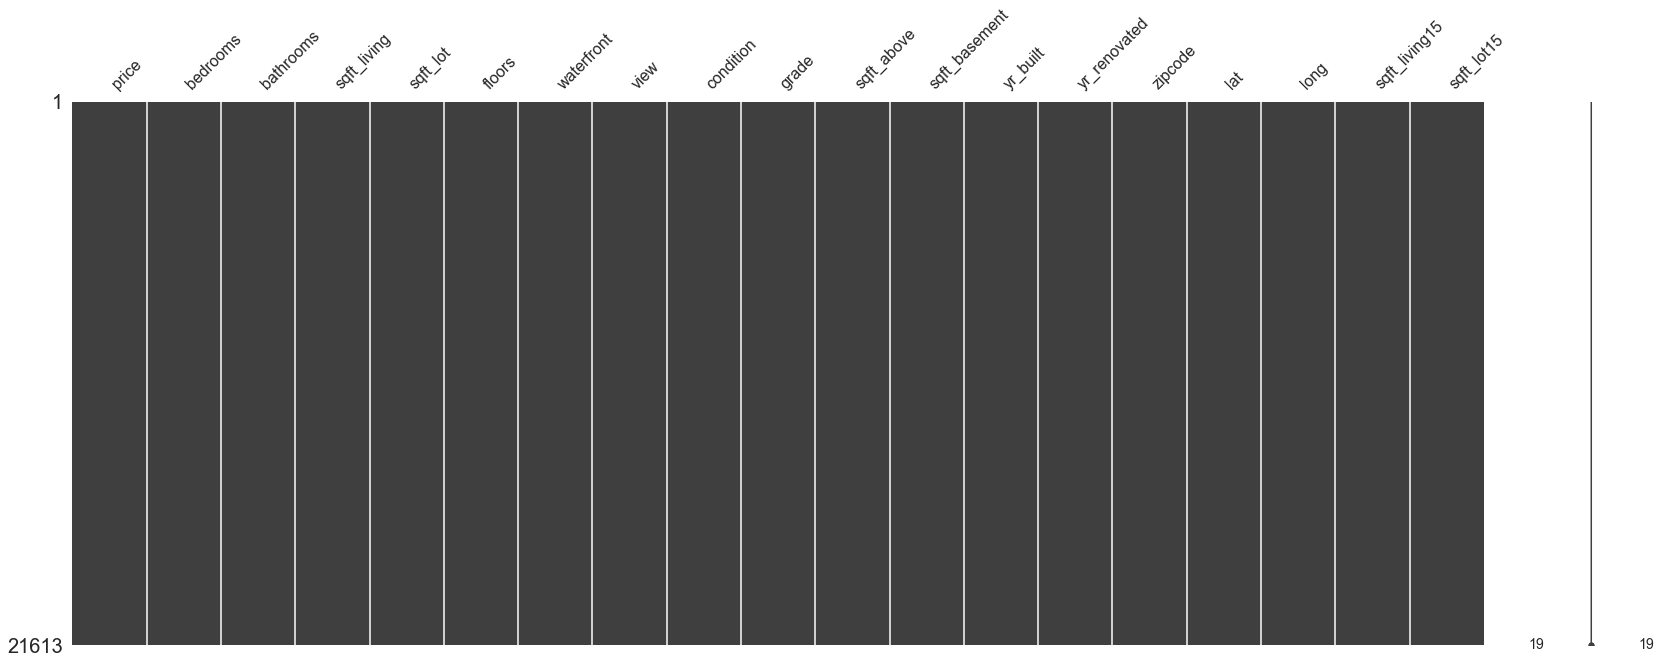

In [423]:
# To find out the missing data
missingno.matrix(df)

# Regression

In [424]:
# Getting the data
X_train, X_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df['price'], random_state=42)

## DecisionTree Regression

In [425]:
dregr = DecisionTreeRegressor()
dregr.fit(X_train, y_train)

DecisionTreeRegressor()

In [426]:
pred = dregr.predict(X_test)
evaluation = calcualte_metrics(dregr, pred, evaluation, X_train, X_test, y_train, y_test)

## RandomForest Regression

In [427]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [428]:
pred = regr.predict(X_test)
evaluation = calcualte_metrics(regr, pred, evaluation, X_train, X_test, y_train, y_test)

In [429]:
evaluation

,Model,Details,Root Mean Squared Error(RMSE),R-Squared(Training),Adjusted R-Squared(training),R-Squared(test),Adjusted R-Sqaured(test),5-fold cross validation
0,LinearRegression,-,274446.416,0.491,0.491,0.496,0.496,0.490
1,DecisionTreeRegressor,-,206398.404,0.999,0.999,0.715,0.714,0.751
2,RandomForestRegressor,-,141387.152,0.982,0.982,0.866,0.866,0.877
